# 4.2.2 [실습] 농구선수의 게임 데이터를 활용한 포지션 예측

## 데이터 획득

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv"
)

In [3]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
df.Pos.value_counts()

Pos
SG    50
C     50
Name: count, dtype: int64

## 데이터 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'STL and 2P in 2d plane')

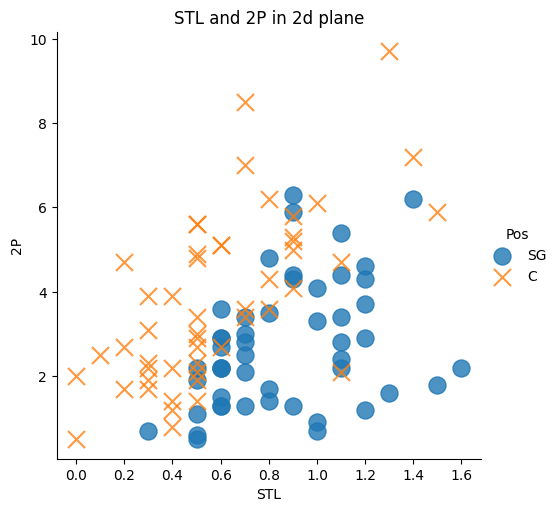

In [9]:
sns.lmplot(
    x="STL",
    y="2P",
    data=df,
    fit_reg=False,
    scatter_kws={"s": 150},
    markers=["o", "x"],
    hue="Pos",
)
plt.title("STL and 2P in 2d plane")

Text(0.5, 1.0, 'AST and 2P in 2d plane')

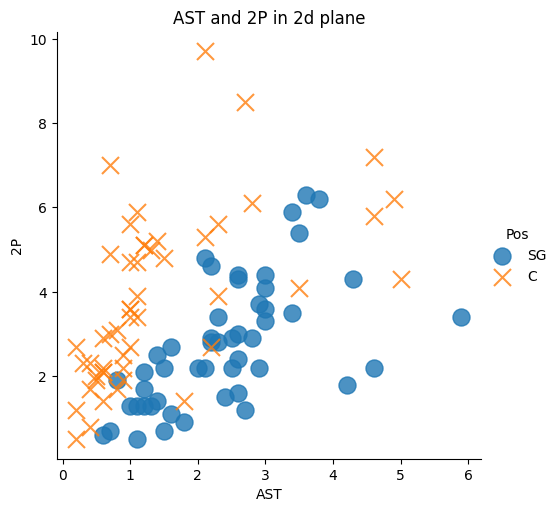

In [10]:
sns.lmplot(
    x="AST",
    y="2P",
    data=df,
    fit_reg=False,
    scatter_kws={"s": 150},
    markers=["o", "x"],
    hue="Pos",
)
plt.title("AST and 2P in 2d plane")

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

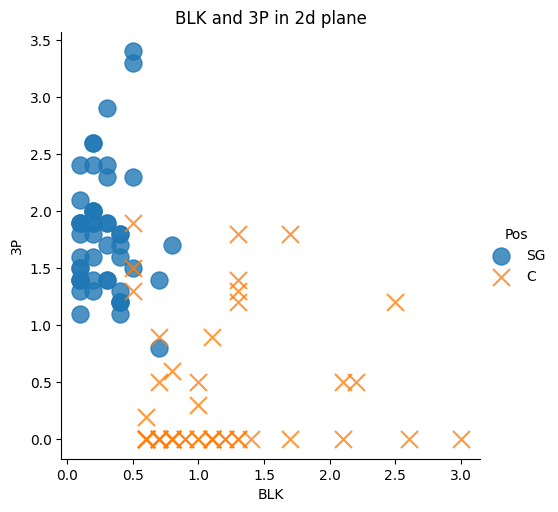

In [12]:
sns.lmplot(
    x="BLK",
    y="3P",
    data=df,
    fit_reg=False,
    scatter_kws={"s": 150},
    markers=["o", "x"],
    hue="Pos",
)
plt.title("BLK and 3P in 2d plane")

Text(0.5, 1.0, 'TRB and 3P in 2d plane')

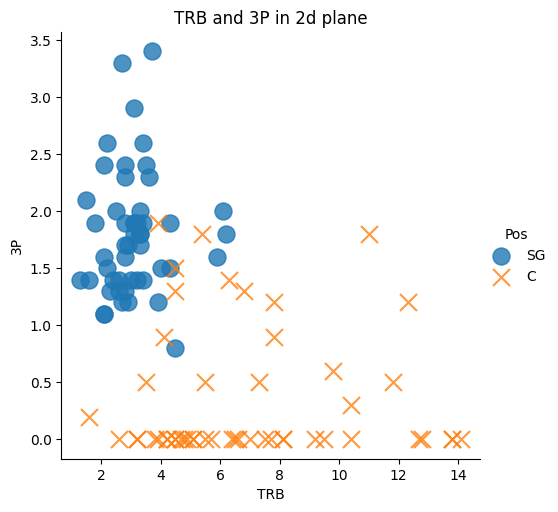

In [13]:
sns.lmplot(
    x="TRB",
    y="3P",
    data=df,
    fit_reg=False,
    scatter_kws={"s": 150},
    markers=["o", "x"],
    hue="Pos",
)
plt.title("TRB and 3P in 2d plane")

## 데이터 다듬기

In [14]:
df.drop(["2P", "AST", "STL"], axis=1, inplace=True)

In [15]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


## 데이터 나누기

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(df, test_size=0.2)

In [21]:
print(train.shape[0])
print(test.shape[0])

80
20


## 최적의 kNN 파라미터 찾기

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[["3P", "BLK", "TRB"]]
y_train = train[["Pos"]]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, x_train, y_train.values.ravel(), cv=10, scoring="accuracy"
    )
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.875,
 0.875,
 0.9125,
 0.9125,
 0.8875,
 0.8875,
 0.9,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.825]

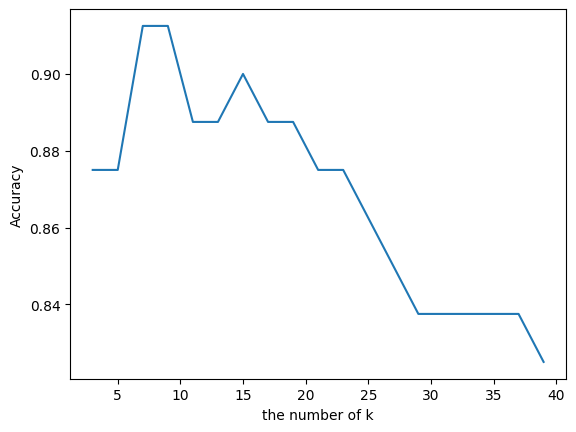

In [26]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel("the number of k")
plt.ylabel("Accuracy")
plt.show()

In [27]:
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 7


## 모델 테스트

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[["3P", "BLK", "TRB"]]
y_train = train[["Pos"]]

knn.fit(x_train, y_train.values.ravel())

x_test = test[["3P", "BLK", "TRB"]]
y_test = test[["Pos"]]

pred = knn.predict(x_test)

print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.95


In [30]:
comparison = pd.DataFrame({"prediction": pred, "ground_truth": y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,SG,SG
3,SG,SG
4,SG,SG
5,C,C
6,C,C
7,C,C
8,SG,SG
9,SG,SG
